In [1]:
#Load main libraries
import numpy as np 
import pandas as pd 
import scipy as sp
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn import preprocessing
import scipy.stats as stats
%matplotlib inline
import pycaret as pyc
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

#Import visual libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import time series analysis libraries
import pmdarima as pmd
import sktime as skt

In [2]:
#Read in the data
df_cc = pd.read_csv(r"C:\Users\tammm\OneDrive\Desktop\portfolio project data\CC GENERAL.csv")
df_cc

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [3]:
#check the shape of data
df_cc.shape

(8950, 18)

In [4]:
data = df_cc.sample(frac=0.95, random_state=650).reset_index(drop=True)
data_unseen = df_cc.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(df_cc.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (8950, 18)
Unseen Data For Predictions: (448, 18)


In [5]:
from pycaret.clustering import *

In [6]:
clust1 = setup(data, normalize = True, 
                   ignore_features = ['CUST_ID'])

Setup Succesfully Completed!


In [7]:
kmeans = create_model('kmeans')

Metric
Silhouette            0.2063
Calinski-Harabasz  1618.0418
Davies-Bouldin        1.5260

In [8]:
kmean_results = assign_model(kmeans)
kmean_results.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C14140   379.542951           0.545455       0.00              0.00   
1  C16214  2526.089973           1.000000    3074.81           1797.85   
2  C16768  2933.577644           1.000000    4562.57           3729.83   
3  C14099  2552.597938           1.000000     550.62              0.00   
4  C16419  2462.416736           1.000000    1207.30           1207.30   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00    925.399531                 0.00   
1                 1276.96    911.367983                 1.00   
2                  832.74      0.000000                 1.00   
3                  583.95      0.000000                 1.00   
4                    0.00    470.529824                 0.25   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.000000   
1                    0.666667                          1.000000   
2                    0.750000                          0.916667   
3                    0.000000                          0.916667   
4                    0.250000                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.083333                 1              0        1500.0   
1                0.166667                 3             28        5500.0   
2                0.000000                 0             88        4000.0   
3                0.000000                 0             24        3000.0   
4                0.166667                 2              5        2500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE    Cluster  
0  2651.530544        190.383316          0.166667      12  Cluster 2  
1  2405.281559        660.502814          0.000000      12  Cluster 1  
2  4237.359587       1026.203480          0.000000      12  Cluster 3  
3   478.632499       1080.350480          0.000000      12  Cluster 1  
4  1609.295692       2571.403534          0.000000      12  Cluster 2

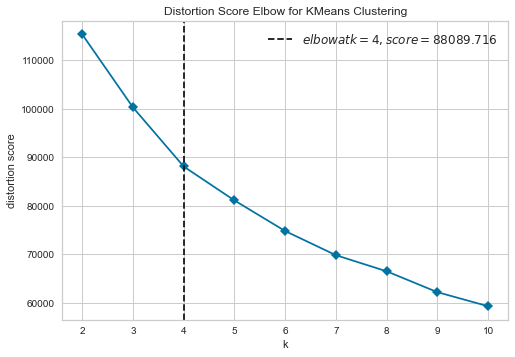

In [9]:
plot_model(kmeans, plot = 'elbow')

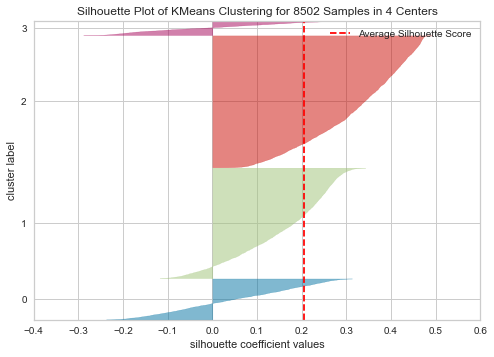

In [10]:
plot_model(kmeans, plot = 'silhouette')

In [11]:
#to see size of clusters
plot_model(kmeans, plot = 'distribution') 

In [12]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C18733  1455.213589           0.833333       0.00              0.00   
1  C18734  3074.490820           1.000000       0.00              0.00   
2  C18735     0.021102           0.125000       0.00              0.00   
3  C18736    11.918653           0.100000     276.79            276.79   
4  C18737  1087.565213           1.000000       0.00              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0   3195.764910                  0.0   
1                     0.0   3382.232089                  0.0   
2                     0.0    922.817511                  0.0   
3                     0.0      0.000000                  0.1   
4                     0.0    216.514140                  0.0   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                               0.0   
1                         0.0                               0.0   
2                         0.0                               0.0   
3                         0.1                               0.0   
4                         0.0                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.833333                10              0        4000.0   
1                0.166667                 2              0        4000.0   
2                0.125000                 1              0        4000.0   
3                0.000000                 0              3        3000.0   
4                0.444444                 4              0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE    Cluster  
0   147.826185        227.431211               0.0       6  Cluster 0  
1  3249.404994        695.004032               0.0      12  Cluster 2  
2    36.672617               NaN               0.0       8  Cluster 2  
3     0.000000               NaN               0.0      10  Cluster 2  
4   283.409367        267.813111               0.0       9  Cluster 2

In [13]:
save_model(kmeans,'Final Kmeans Model 30 Sept 2020')

Transformation Pipeline and Model Succesfully Saved


In [14]:
saved_kmeans = load_model('Final Kmeans Model 30 Sept 2020')

Transformation Pipeline and Model Sucessfully Loaded


In [15]:
new_prediction = predict_model(saved_kmeans, data=data_unseen)
new_prediction.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C18733  1455.213589           0.833333       0.00              0.00   
1  C18734  3074.490820           1.000000       0.00              0.00   
2  C18735     0.021102           0.125000       0.00              0.00   
3  C18736    11.918653           0.100000     276.79            276.79   
4  C18737  1087.565213           1.000000       0.00              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0   3195.764910                  0.0   
1                     0.0   3382.232089                  0.0   
2                     0.0    922.817511                  0.0   
3                     0.0      0.000000                  0.1   
4                     0.0    216.514140                  0.0   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                               0.0   
1                         0.0                               0.0   
2                         0.0                               0.0   
3                         0.1                               0.0   
4                         0.0                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.833333                10              0        4000.0   
1                0.166667                 2              0        4000.0   
2                0.125000                 1              0        4000.0   
3                0.000000                 0              3        3000.0   
4                0.444444                 4              0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE    Cluster  
0   147.826185        227.431211               0.0       6  Cluster 0  
1  3249.404994        695.004032               0.0      12  Cluster 2  
2    36.672617               NaN               0.0       8  Cluster 2  
3     0.000000               NaN               0.0      10  Cluster 2  
4   283.409367        267.813111               0.0       9  Cluster 2